# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind

In [2]:
import sys
sys.path.append('../src')
from functions import *

In [3]:
sys.path.append('../src')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
pd.set_option('display.max_columns', None)

# Data Preprocessing
### Ensure that the data types are correctly assigned, especially for categorical variables.

In [4]:
df_final = convert_data_types(df_final)

# Calculate Correlation Coefficients

# Multivariate Analysis

In [10]:
# Tenure + Age + Completion Control
tenure_age_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['clnt_tenure_yr', 'clnt_age', 'completion']).size().reset_index(name='count')
tenure_age_completion_control.to_csv('../Tables/tenure_age_completion.csv', index=False)
tenure_age_completion_control

,clnt_tenure_yr,clnt_age,completion,count
0,2,19,True,1
1,2,22,False,1
2,2,22,True,1
3,2,25,False,6
4,2,25,True,3
...,...,...,...,...
3546,52,62,False,2
3547,52,62,True,1
3548,54,39,False,2
3549,55,48,True,1


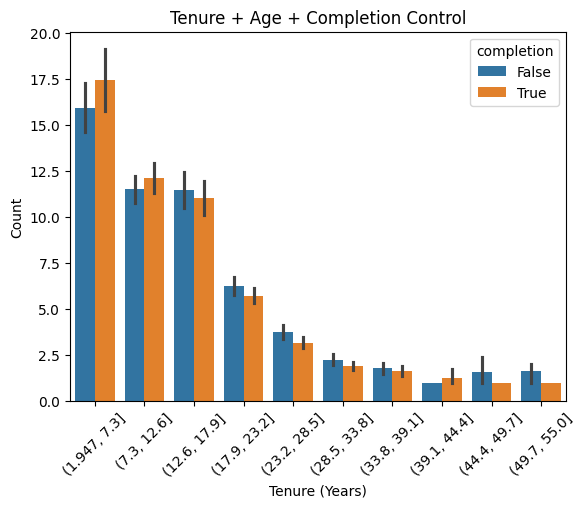

In [11]:
# Tenure + Age + Completion Control Visualization with binning
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
# Tenure + Age + Completion Test
tenure_age_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['clnt_tenure_yr', 'clnt_age', 'completion']).size().reset_index(name='count')
tenure_age_completion_test.to_csv('../Tables/tenure_age_completion.csv', index=False)
tenure_age_completion_test

,clnt_tenure_yr,clnt_age,completion,count
0,2,21,True,1
1,2,22,False,1
2,2,23,False,1
3,2,23,True,4
4,2,24,False,1
...,...,...,...,...
3615,51,60,True,1
3616,55,42,False,1
3617,55,42,True,1
3618,55,45,True,1


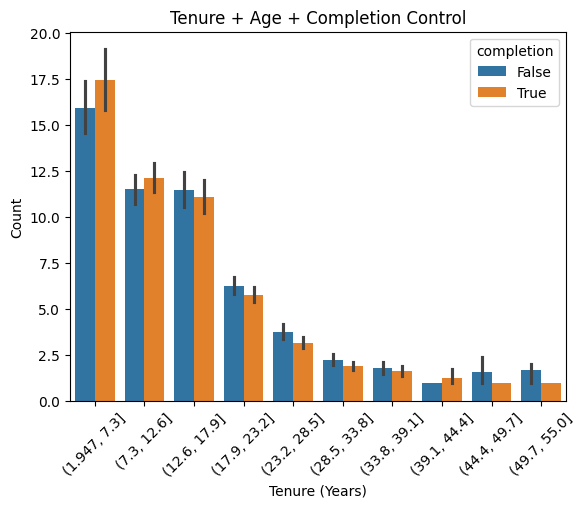

In [15]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
# Tenure + Gender + Completion Control
tenure_gender_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['clnt_tenure_yr', 'gendr', 'completion']).size().reset_index(name='count')
tenure_gender_completion_control.to_csv('../Tables/tenure_gender_completion_control.csv', index=False)
tenure_gender_completion_control


,clnt_tenure_yr,gendr,completion,count
0,2,F,False,5
1,2,F,True,2
2,2,M,False,2
3,2,M,True,4
4,2,Other,False,27
...,...,...,...,...
235,52,F,False,2
236,52,F,True,1
237,54,F,False,2
238,55,F,False,1


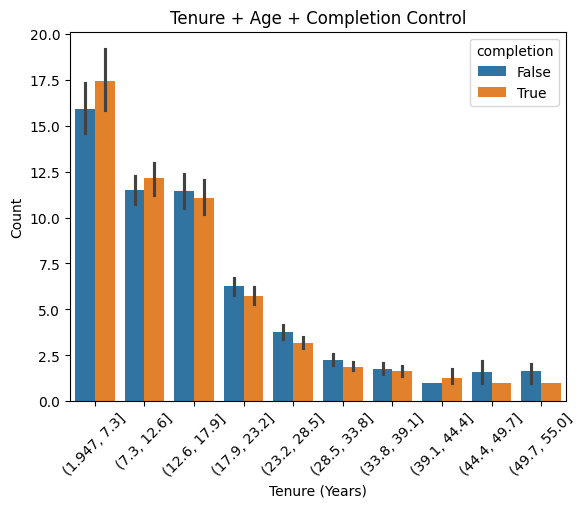

In [17]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
# Tenure + Gender + Completion Test
tenure_gender_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['clnt_tenure_yr', 'gendr', 'completion']).size().reset_index(name='count')
tenure_gender_completion_test.to_csv('../Tables/tenure_gender_completion_test.csv', index=False)
tenure_gender_completion_test


,clnt_tenure_yr,gendr,completion,count
0,2,F,False,1
1,2,F,True,2
2,2,M,False,1
3,2,M,True,4
4,2,Other,False,12
...,...,...,...,...
239,51,F,False,1
240,51,F,True,3
241,55,M,False,1
242,55,M,True,2


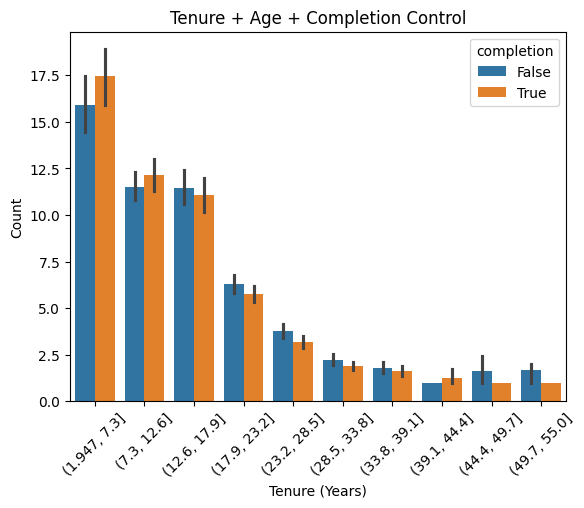

In [20]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Balance + Tenure + Completion Control
balance_tenure_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['clnt_tenure_yr', 'bal', 'completion']).size().reset_index(name='count')
balance_tenure_completion_control.to_csv('../Tables/balance_tenure_completion_control.csv', index=False)
balance_tenure_completion_control

,clnt_tenure_yr,bal,completion,count
0,2,27397.75,False,1
1,2,27397.75,True,1
2,2,29146.95,False,1
3,2,30085.17,True,1
4,2,30098.53,True,1
...,...,...,...,...
27475,52,57944.95,False,2
27476,52,57944.95,True,1
27477,54,70645.03,False,2
27478,55,157703.82,False,1


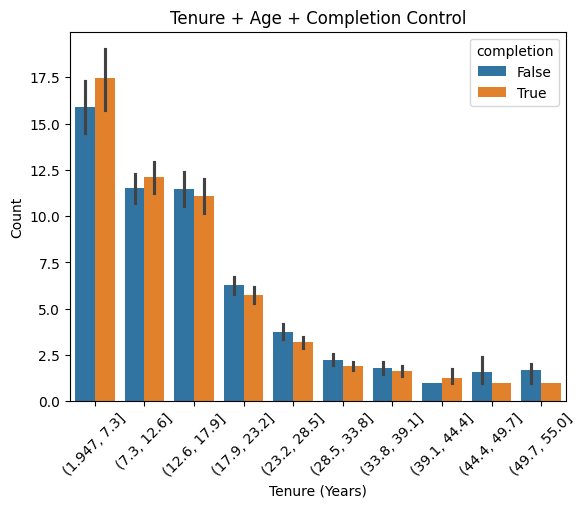

In [22]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Balance + Tenure + Completion Test
balance_tenure_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['clnt_tenure_yr', 'bal', 'completion']).size().reset_index(name='count')
balance_tenure_completion_test.to_csv('../Tables/balance_tenure_completion_test.csv', index=False)
balance_tenure_completion_test

,clnt_tenure_yr,bal,completion,count
0,2,26814.29,True,2
1,2,26819.15,True,1
2,2,26903.76,True,1
3,2,29931.46,False,1
4,2,29959.24,True,1
...,...,...,...,...
30566,51,70986.53,True,1
30567,55,45780.56,False,1
30568,55,130125.49,False,1
30569,55,130125.49,True,1


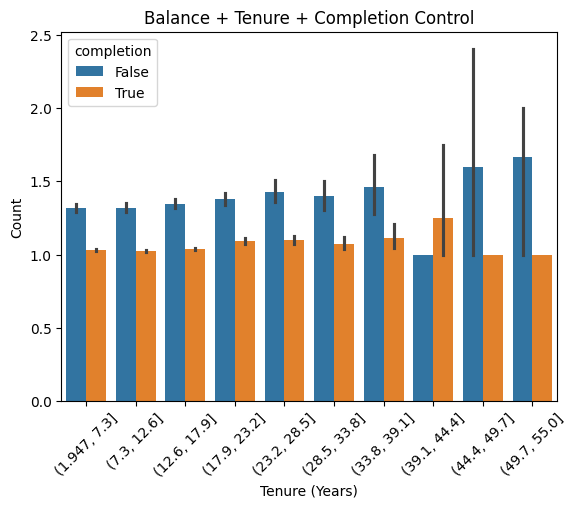

In [24]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
df_final.columns

Index(['client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2',
       'step_3', 'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'last_step',
       'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date',
       'initial_date', 'total_time_visit', 'final_date'],
      dtype='object')

In [27]:
# Total Navigation + Last Step Control
total_nav_last_step_control = df_final[df_final['variation'] == 'Control'].groupby(['navigations_bt_start_last', 'last_step']).size().reset_index(name='count')
total_nav_last_step_control.to_csv('../Tables/total_nav_last_step_control.csv', index=False)
total_nav_last_step_control

,navigations_bt_start_last,last_step,count
0,1,confirm,761
1,2,confirm,125
2,2,start,4659
3,2,step_1,18
4,2,step_2,10
...,...,...,...
113,41,start,1
114,41,step_1,2
115,65,step_1,1
116,73,confirm,2


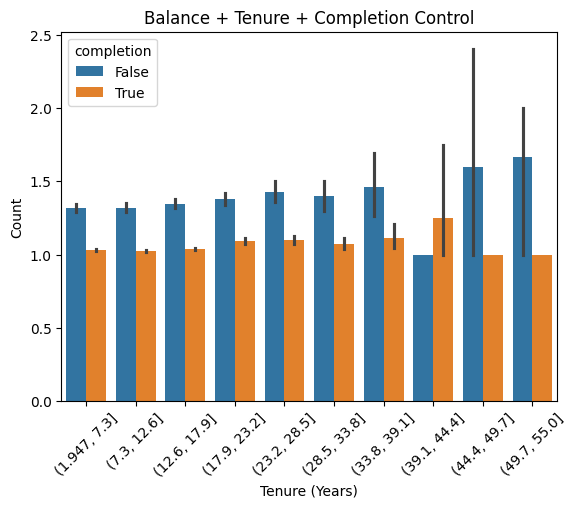

In [28]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Total Navigation + Last Step Test
total_nav_last_step_test = df_final[df_final['variation'] == 'Test'].groupby(['navigations_bt_start_last', 'last_step']).size().reset_index(name='count')
total_nav_last_step_test.to_csv('../Tables/total_nav_last_step_test.csv', index=False)
total_nav_last_step_test

,navigations_bt_start_last,last_step,count
0,1,confirm,3366
1,1,step_1,1
2,2,confirm,189
3,2,start,2995
4,2,step_1,24
...,...,...,...
132,43,step_1,1
133,49,confirm,1
134,56,confirm,1
135,60,confirm,1


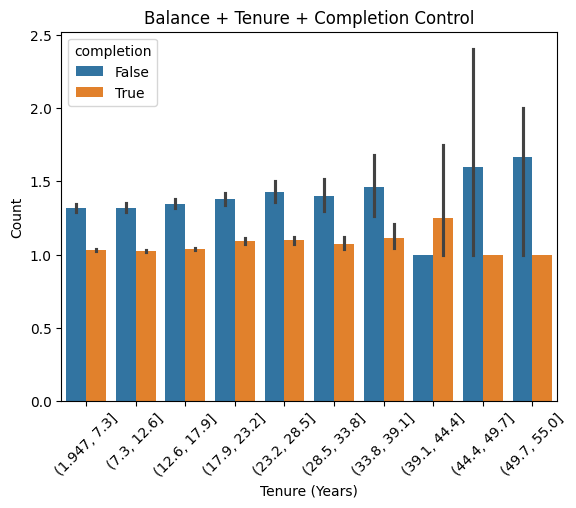

In [31]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Total Navigation and Completions Control
total_nav_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['navigations_bt_start_last', 'completion']).size().reset_index(name='count')
total_nav_completion_control.to_csv('../Tables/total_nav_completion_control.csv', index=False)
total_nav_completion_control

,navigations_bt_start_last,completion,count
0,1,True,761
1,2,False,4706
2,2,True,124
3,3,False,4164
4,3,True,66
5,4,False,2032
6,4,True,200
7,5,False,2328
8,5,True,9465
9,6,False,986


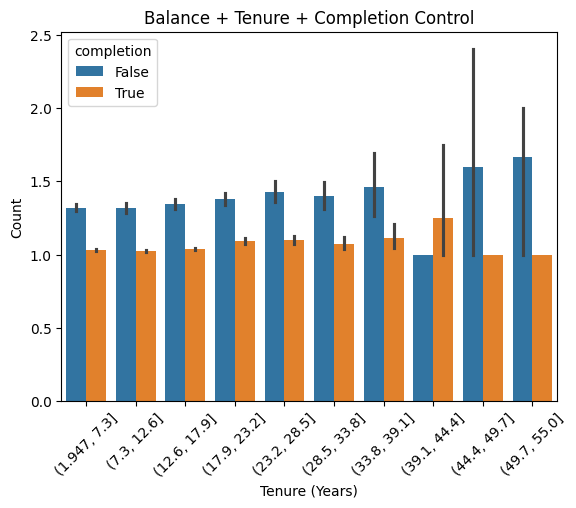

In [34]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Total Navigation and Completions Test
total_nav_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['navigations_bt_start_last', 'completion']).size().reset_index(name='count')
total_nav_completion_test.to_csv('../Tables/total_nav_completion_test.csv', index=False)
total_nav_completion_test

,navigations_bt_start_last,completion,count
0,1,True,3367
1,2,False,3068
2,2,True,193
3,3,False,3014
4,3,True,88
...,...,...,...
66,43,True,1
67,49,True,1
68,56,True,1
69,60,True,1


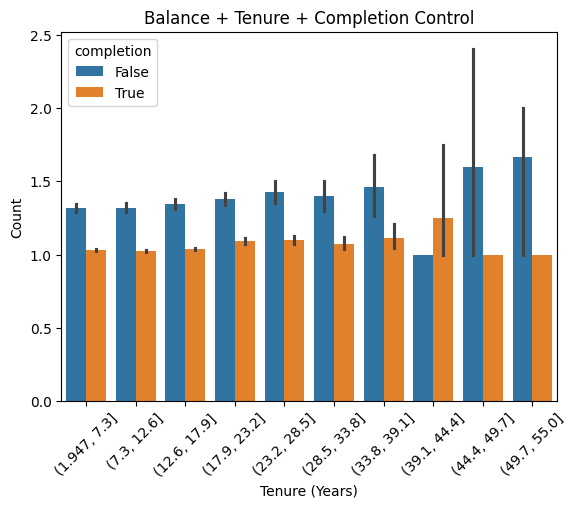

In [36]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Step Where Clients Drop Control
steps_drop_control = df_final[df_final['variation'] == 'Control'].groupby('last_step').size().reset_index(name='count')
steps_drop_control.to_csv('../Tables/steps_drop_control.csv', index=False)
steps_drop_control

,last_step,count
0,confirm,15383
1,start,9640
2,step_1,3502
3,step_2,1460
4,step_3,2250


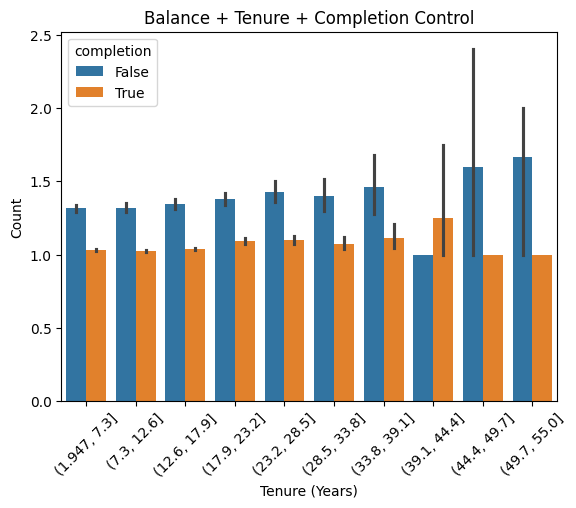

In [38]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Step Where Clients Drop Test
steps_drop_test = df_final[df_final['variation'] == 'Test'].groupby('last_step').size().reset_index(name='count')
steps_drop_test.to_csv('../Tables/steps_drop_test.csv', index=False)
steps_drop_test

,last_step,count
0,confirm,21496
1,start,9452
2,step_1,3139
3,step_2,1321
4,step_3,1782


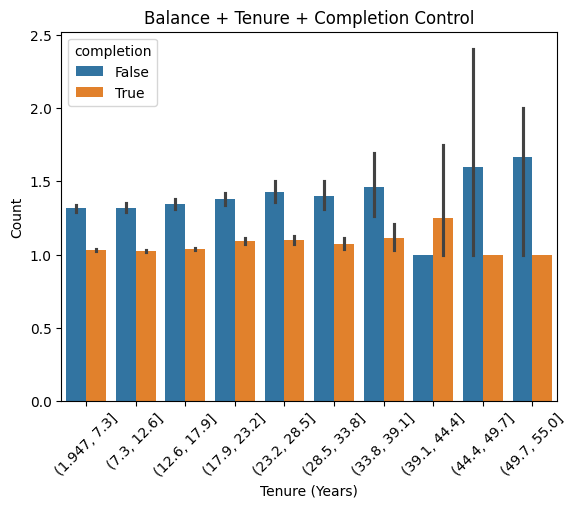

In [40]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
